In [2]:
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

In [3]:
data = yf.download(tickers='AAPL', period='5y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.400942,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.789471,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.323915,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.339539,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.457672,283192000
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.970001,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.690002,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.869995,121047300


In [5]:
sma_30 = pd.DataFrame()
sma_30['Adj_close'] = data['Adj Close'].rolling(window=30).mean()
sma_30

,Adj_close
Date,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2020-12-24,122.509333
2020-12-28,123.092000
2020-12-29,123.612333


In [6]:
sma_100 = pd.DataFrame()
sma_100['Adj_close'] = data['Adj Close'].rolling(window=100).mean()
sma_100

,Adj_close
Date,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2020-12-24,118.087289
2020-12-28,118.357437
2020-12-29,118.571120


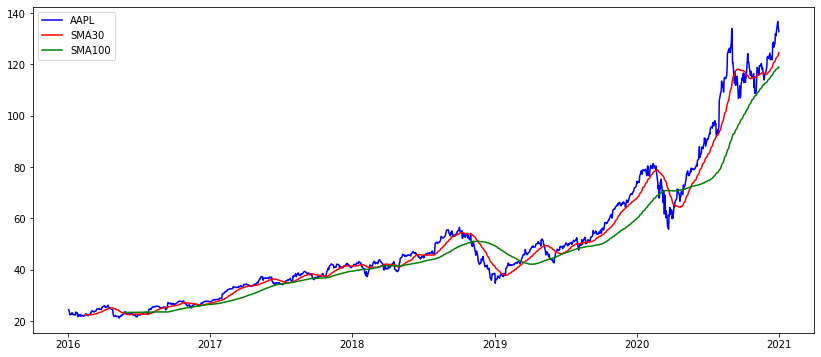

In [8]:
import matplotlib.pyplot as plt
import pylab as pl

pl.figure(figsize=(14,6))
pl.plot(data.index,data['Adj Close'],label='AAPL',color="b")
pl.plot(sma_30.index,sma_30['Adj_close'], label='SMA30',color="r")
pl.plot(sma_100.index,sma_100['Adj_close'],label='SMA100', color="g")
pl.legend(loc="best")

pl.show()

In [9]:
data['Adj Close']

Date
2016-01-04     24.400942
2016-01-05     23.789471
2016-01-06     23.323915
2016-01-07     22.339539
2016-01-08     22.457672
                 ...    
2020-12-24    131.970001
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
Name: Adj Close, Length: 1259, dtype: float64

In [10]:
# Create a dataframe of all adj close prices
udata = pd.DataFrame(index=data.index)
#udata['Date'] = data.index
udata['stock_adj_close'] = data['Adj Close']
udata['SMA_30'] = sma_30['Adj_close']
udata['SMA_100']= sma_100['Adj_close']

In [11]:
udata

,stock_adj_close,SMA_30,SMA_100
Date,,,
2016-01-04,24.400942,NaN,NaN
2016-01-05,23.789471,NaN,NaN
2016-01-06,23.323915,NaN,NaN
2016-01-07,22.339539,NaN,NaN
2016-01-08,22.457672,NaN,NaN
...,...,...,...
2020-12-24,131.970001,122.509333,118.087289
2020-12-28,136.690002,123.092000,118.357437
2020-12-29,134.869995,123.612333,118.571120


In [12]:
udata.reset_index(inplace=True)

In [13]:
udata

,Date,stock_adj_close,SMA_30,SMA_100
0,2016-01-04,24.400942,NaN,NaN
1,2016-01-05,23.789471,NaN,NaN
2,2016-01-06,23.323915,NaN,NaN
3,2016-01-07,22.339539,NaN,NaN
4,2016-01-08,22.457672,NaN,NaN
...,...,...,...,...
1254,2020-12-24,131.970001,122.509333,118.087289
1255,2020-12-28,136.690002,123.092000,118.357437
1256,2020-12-29,134.869995,123.612333,118.571120
1257,2020-12-30,133.720001,124.059666,118.799109


In [14]:
#Create a Function to signal when to buy and sell
def buy_sell_fun(data):
    sig_price_buy = []
    sig_price_sell = []
    flag = -1

    for i in range(len(data)):
        if data['SMA_30'][i] > data['SMA_100'][i]:
            if flag != 1:
                sig_price_buy.append(data['stock_adj_close'][i])
                sig_price_sell.append(np.nan)
                flag = 1
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)
        elif data['SMA_30'][i] < data['SMA_100'][i]:
            if flag !=0:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(data['stock_adj_close'][i])
                flag = 0
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)
        else:
            sig_price_buy.append(np.nan)
            sig_price_sell.append(np.nan)

    return (sig_price_buy, sig_price_sell)

def chart_data(data,stock):
    #store the buy and sell data into a variable
    buy_sell = buy_sell_fun(data)
    data['buy_signal_price'] = buy_sell[0]
    data['sell_signal_price']=buy_sell[1]

    #Looking for the dates of the buy signals
    buy_dates = data.loc[data['buy_signal_price']>0]

    #Looking for the dates of the sell signals
    sell_dates = data.loc[data['sell_signal_price']>0]

    #Dropping uneccessary columns
    buy_dates.drop(columns = ['sell_signal_price', 'SMA_30', 'SMA_100'], inplace = True)
    sell_dates.drop(columns = ['buy_signal_price', 'SMA_30', 'SMA_100'], inplace = True)

    # DF of dates with prices
    dates = pd.concat([buy_dates, sell_dates],sort = True)

    # Now to organize by the dates, drop adj_close price column, and make date the index
    dates.sort_values(by = 'Date', inplace = True)
    dates.drop(columns = ['stock_adj_close'],inplace = True)
    dates.set_index('Date', inplace = True)

    #visualize data and strategy to buy and sell stock
    ab = plt.figure(figsize=(20,12))
    combined = data.copy()
    combined.Date = pd.to_datetime(combined.Date).dt.strftime('%b %d %Y')
    last_date = combined['Date'].iloc[-1]
    first_date = combined['Date'].iloc[0]
    plt.plot(data['stock_adj_close'],label = 'PMAC', alpha = 0.35)
    plt.plot(data['SMA_30'], label = 'SMA30', alpha = 0.35)
    plt.plot(data['SMA_100'],label = 'SMA100', alpha = 0.35)
    plt.scatter(data.index, data['buy_signal_price'],label = 'Buy',marker = '^', color = 'green')
    plt.scatter(data.index, data['sell_signal_price'], label = 'Sell', marker = 'v', color = 'red')
    plt.title('{} adj close price history buy and sell signals'.format(stock))
    plt.xlabel('{} - {}'.format(first_date, last_date))
    plt.ylabel('Adj close price USD')
    plt.legend()
    plt.show()
    print(dates)



In [15]:
buy_sell_fun(udata)

([nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,

C:\Users\eitan\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


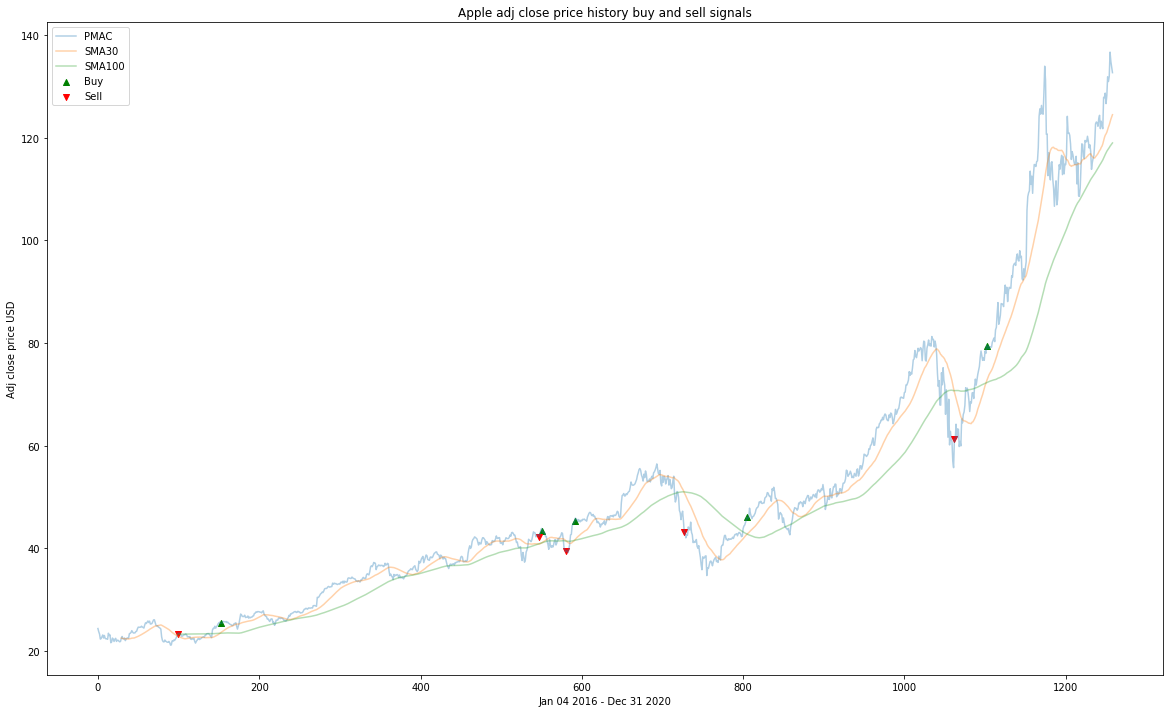

            buy_signal_price  sell_signal_price
Date                                           
2016-05-25               NaN          23.340221
2016-08-10         25.440668                NaN
2018-03-07               NaN          42.280163
2018-03-13         43.473465                NaN
2018-04-25               NaN          39.531212
2018-05-09         45.258598                NaN
2018-11-20               NaN          43.216839
2019-03-18         46.109615                NaN
2020-03-24               NaN          61.336773
2020-05-20         79.526665                NaN


In [16]:
chart_data(udata,'Apple')

In [17]:
udata.iloc[-1]

Date                 2020-12-31 00:00:00
stock_adj_close                   132.69
SMA_30                           124.503
SMA_100                          119.001
buy_signal_price                     NaN
sell_signal_price                    NaN
Name: 1258, dtype: object

In [18]:
udata['Date'].iloc[-1]

Timestamp('2020-12-31 00:00:00')

In [27]:
pwd()

'C:\\Users\\eitan\\Downloads\\data science in finance'

In [34]:
last = pd.DataFrame(udata.apply(pd.Series.last_valid_index))
last

,0
Date,1258
stock_adj_close,1258
SMA_30,1258
SMA_100,1258
buy_signal_price,1102
sell_signal_price,1062


In [39]:
if int(last.iloc[4][0]) > int(last.iloc[5][0]):
    print(udata["stock_adj_close"].iloc[-1])
else:
    k = int(last.iloc[5])
    print(udata["sell_signal_price"].iloc[k])

132.69000244140625
